In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
from pathlib import Path

In [0]:
PATH_TO_DATA = Path('/content/gdrive/My Drive/mlcourse/part_3/')

In [0]:
times = ['time%s' % i for i in range(1, 11)]

In [0]:
df_train = pd.read_csv(PATH_TO_DATA / 'train_sessions.csv', index_col='session_id', parse_dates=times)

In [0]:
df_test = pd.read_csv(PATH_TO_DATA /  'test_sessions.csv',  index_col='session_id', parse_dates=times)

In [0]:
df_pred = pd.read_csv(PATH_TO_DATA / 'pred.csv', index_col='session_id')

In [0]:
drop_col = ['site1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
            'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
            'site9', 'time9', 'site10', 'time10']

In [0]:
df_test['target'] = df_pred['target']

In [0]:
df_train.drop(drop_col, axis = 1, inplace = True)
df_test.drop( drop_col, axis = 1, inplace = True)

In [0]:
df_full = pd.concat([df_train, df_test])

In [13]:
print(df_full['time1'].min())
print(df_full['time1'].max())

2013-01-12 08:05:57
2014-12-05 23:26:53


In [0]:
start_time = pd.Timestamp(year=2013, month=1,  day=12, hour=0)
end_time   = pd.Timestamp(year=2014, month=12, day=5, hour=0)

In [15]:
for i in range(1000):
  current_time = start_time + pd.DateOffset(days=i)
  if current_time == end_time:
    days = i
    print('days:', i)

days: 692


In [0]:
ind = [start_time + pd.DateOffset(days=i) for i in range(days)]
df_days = pd.DataFrame(index = ind)

In [0]:
df_days['sessions'] = [len(df_full[(df_full['time1'] >= start_time + pd.DateOffset(days=i)) &
                          (df_full['time1'] < start_time + pd.DateOffset(days=i + 1))
                            ]) for i in range(days)]

In [0]:
df_days['target'] = [sum(df_full[(df_full['time1'] >= start_time + pd.DateOffset(days=i)) &
         (df_full['time1'] < start_time + pd.DateOffset(days=i + 1))
           ].target) for i in range(days)]

In [0]:
df_days['ses_scale'] = df_days['sessions'] / df_days['sessions'].max()
df_days['tar_scale'] = df_days['target']  / df_days['target'].max()

In [20]:
df_days.head()

,sessions,target,ses_scale,tar_scale
2013-01-12,363,0.0,0.045973,0.0
2013-01-13,0,0.0,0.000000,0.0
2013-01-14,0,0.0,0.000000,0.0
2013-01-15,0,0.0,0.000000,0.0
2013-01-16,0,0.0,0.000000,0.0


In [0]:
import matplotlib.pyplot as plt

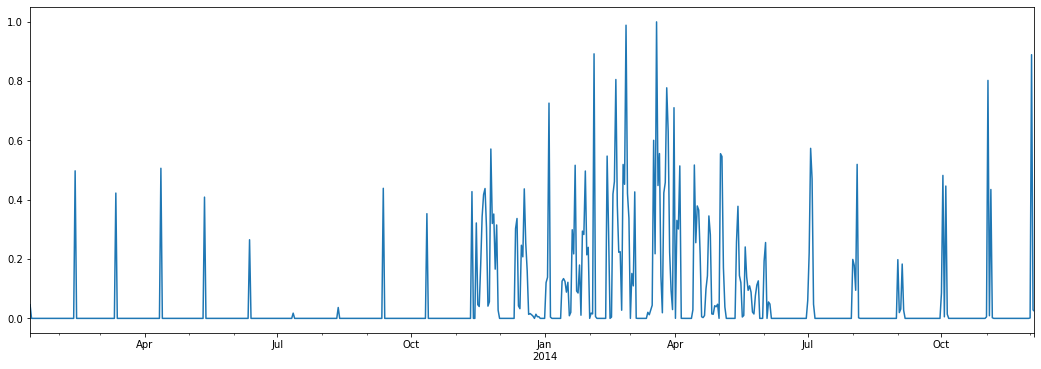

In [22]:
plt.figure(figsize=(18, 6));
df_days['ses_scale'].plot();

In [23]:
df_train['time1'].max()

Timestamp('2014-04-30 23:39:53')

<Figure size 1296x432 with 0 Axes>

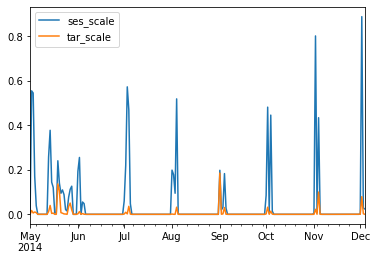

In [24]:
#Test data
plt.figure(figsize=(18, 6));
((df_days[df_days.index > df_train['time1'].max()]).drop(['sessions', 'target'], axis = 1)).plot();

In [25]:
sum(df_days[(df_days.index > df_train['time1'].max()) & (df_days['target'] > 0)].target)

392.94214944124894

<Figure size 1296x432 with 0 Axes>

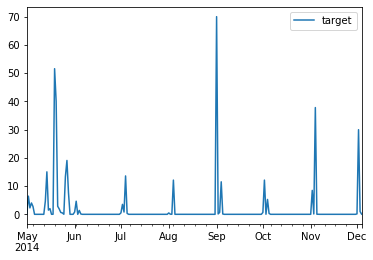

In [26]:
#Test data
plt.figure(figsize=(18, 6));
(df_days[df_days.index > df_train['time1'].max()].drop(['sessions', 'ses_scale', 'tar_scale'], axis = 1)).plot();

###С июня 2014 до конца тестового сета идут блоки с первыми 5 днями месяца

In [27]:
df_days[df_days.sessions > 0][130:187]

,sessions,target,ses_scale,tar_scale
2014-04-28,337,0.000000,0.042680,0.000000
2014-04-29,310,0.000000,0.039260,0.000000
2014-04-30,376,0.000000,0.047619,0.000000
2014-05-01,1,0.002468,0.000127,0.000007
2014-05-02,4386,6.432628,0.555471,0.017063
2014-05-03,4310,2.267921,0.545846,0.006016
2014-05-04,1351,4.018637,0.171099,0.010660
2014-05-05,304,2.758139,0.038501,0.007316
2014-05-13,2034,4.674150,0.257599,0.012398
2014-05-14,2985,15.030449,0.378040,0.039869


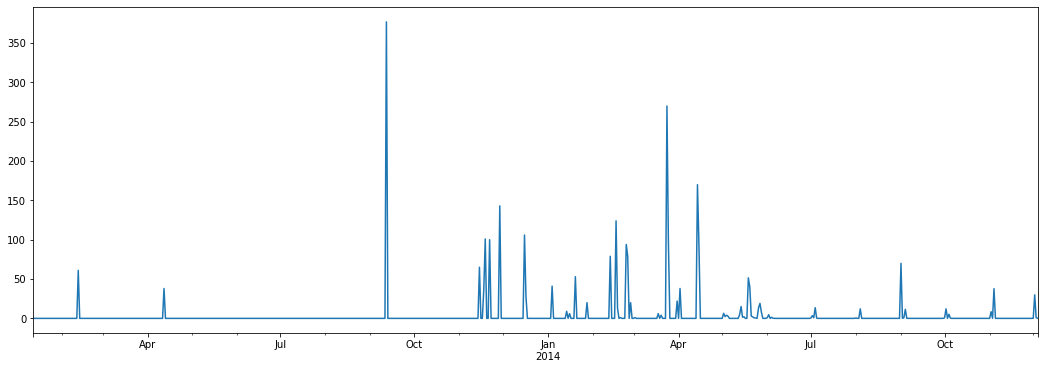

In [33]:
plt.figure(figsize=(18, 6));
df_days['target'].plot();

,sessions,target,ses_scale,tar_scale
2013-02-12,3929,61.0,0.497594,0.161804
2013-04-12,3997,38.0,0.506206,0.100796
2013-09-12,3464,377.0,0.438703,1.000000
2013-11-15,2541,65.0,0.321809,0.172414
2013-11-18,1410,37.0,0.178571,0.098143
2013-11-19,2709,101.0,0.343085,0.267905
2013-11-22,2421,100.0,0.306611,0.265252
2013-11-29,2488,143.0,0.315096,0.379310
2013-12-16,1948,106.0,0.246707,0.281167
2013-12-17,1639,28.0,0.207573,0.074271


###Гипотеза 1: Занулить все предсказанные летние таргеты

Гипотеза не сработала, скор 0.893

###Гипотеза 2: остаток от деления номера дня в году

In [0]:
times = ['time%s' % i for i in range(1, 11)]

In [0]:
df_train = pd.read_csv(PATH_TO_DATA / 'train_sessions.csv', index_col='session_id', parse_dates=times)

In [0]:
df_test = pd.read_csv(PATH_TO_DATA /  'test_sessions.csv',  index_col='session_id', parse_dates=times)

In [0]:
df_full = pd.concat([df_train.drop('target', axis = 1), df_test])

In [0]:
df_features = pd.DataFrame(index=df_train.index)
df_features['session_duration'] = (df_train[times].max(axis=1) - df_train[times].min(axis=1)).astype('timedelta64[ms]').astype(int)
df_features['year']    = df_train['time1'].apply(lambda ts: ts.year).astype('object')
hour = df_train['time1'].apply(lambda ts: ts.hour).astype('int')
df_features['morning'] = ((hour >= 7 ) & (hour <= 11)).astype('object')
df_features['day'] = ((hour >= 12) & (hour <= 17)).astype('object')
df_features['evening'] = ((hour >= 18) & (hour <= 23)).astype('object')
df_features['year']    = df_train['time1'].apply(lambda ts: ts.year).astype('object')
df_features['day_of_year'] = df_train['time1'].apply(lambda ts: ts.dayofyear)

In [91]:
df_features.head()

,session_duration,year,morning,day,evening,n_days,day_of_year
session_id,,,,,,,
1,0,2014,True,False,False,9,51
2,26000,2014,True,False,False,11,53
3,7000,2013,False,True,False,5,350
4,270000,2014,True,False,False,17,87
5,246000,2014,True,False,False,17,59


###Гипотеза 3: Учить на данных с 15 ноября по 30 апреля

### Гипотеза 4: отбор категориальных признаков катбустом

###Гипотеза 5: попробовать tfidf